In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir('../input/digit-recognizer-mnist/'))

['sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
#read train set
train = pd.read_csv('../input/digit-recognizer-mnist/train.csv')
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#read test set
test = pd.read_csv('../input/digit-recognizer-mnist/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# place column 'label' into Y_train
Y_train = train['label']
# drop 'label' from train for X_train
X_train = train.drop(['label'],axis=1)
print(X_train.shape, Y_train.shape)

(42000, 784) (42000,)


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64
Mean exmaples per class: 4200.0


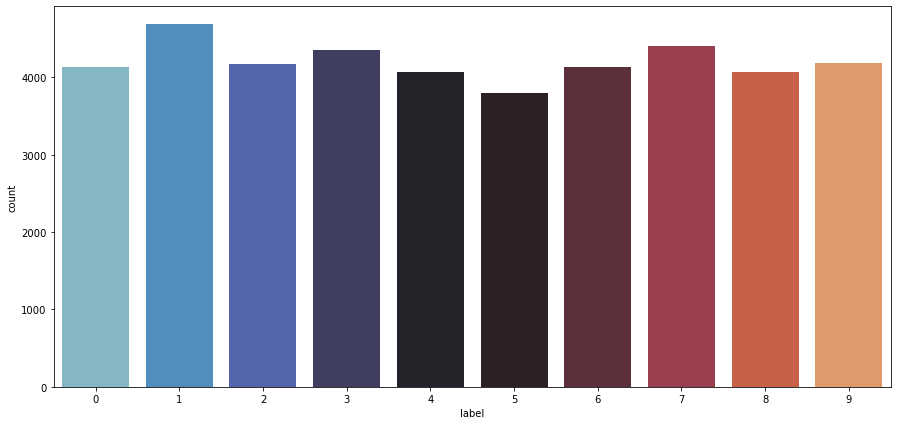

In [5]:
# we visualize the number of examples in each class
plt.figure(figsize=(15,7))
print(Y_train.value_counts())
sns.countplot(Y_train,palette='icefire')  
print('Mean exmaples per class: {}'.format(Y_train.value_counts().mean()))

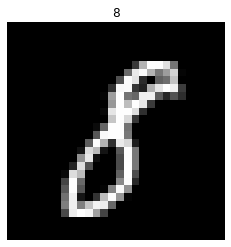

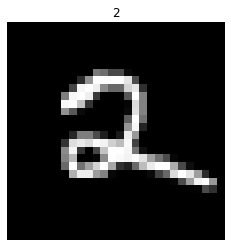

In [6]:
idx = 5000
idx1= 41000
img = X_train.iloc[idx].values
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[idx,0])
plt.axis('off')
plt.show()
img1 = X_train.iloc[idx1].values
img1 = img1.reshape((28,28))
plt.imshow(img1,cmap='gray')
plt.title(train.iloc[idx1,0])
plt.axis('off')
plt.show()

In [7]:
# Normalize the data for faster computation
X_train = X_train/255.0
test = test/255.0
print(X_train.shape, test.shape)

(42000, 784) (28000, 784)


In [8]:
#reshape data into (28,28,1) 3D image matrices . Uses 1 channel since the image is in grayscale
x_train_reshape = X_train.values.reshape(-1,28,28,1)
test_reshape = test.values.reshape(-1,28,28,1)
print(x_train_reshape.shape,test_reshape.shape)

(42000, 28, 28, 1) (28000, 28, 28, 1)


In [9]:
# one-hot encoding
from keras.utils.np_utils import to_categorical
Y_train = to_categorical(Y_train,num_classes=10)
print(Y_train.shape)

(42000, 10)


In [10]:
# create train and validation sets
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train_reshape,Y_train,test_size=0.1,random_state=2)
print(x_train.shape,x_val.shape,y_train.shape,y_val.shape)

(37800, 28, 28, 1) (4200, 28, 28, 1) (37800, 10) (4200, 10)


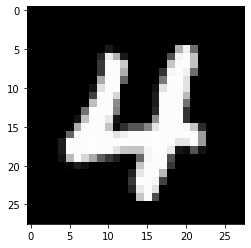

In [11]:
plt.imshow(x_train[4000][:,:,0],cmap='gray')
plt.show()

In [12]:
# define ConvNet with architecture :
# conv -> maxPool -> dropout -> conv -> maxPool -> dropout -> flatten -> Dense -> dropout -> Dense(softmax output)
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator

model = Sequential(
    [# convolutional layers
     layers.Conv2D(filters=8,kernel_size=(5,5),activation='relu',padding='Same',input_shape=(28,28,1)),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Dropout(0.25),
     layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu',padding='Same'),
     layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
     layers.Dropout(0.25),
     # fully connected layers
     layers.Flatten(),
     layers.Dense(256,activation='relu'),
     layers.Dropout(0.5),
     layers.Dense(10,activation='softmax')
    ])

In [13]:
# Adam optimizer
optimizer = Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)

In [14]:
# compile the model
# loss used is categorical crossentropy (for 10 classes), unlike binary crossentropy used in logistic regression
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
epochs = 10
batch_size = 250
# data augmentation to prevent overfitting
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)
print(y_val.shape)

(4200, 10)


In [16]:
# fit the model with data generator
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val), steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 17s 114ms/step - loss: 1.0868 - accuracy: 0.6370 - val_loss: 0.2205 - val_accuracy: 0.9457
Epoch 2/10
151/151 [==============================] - 18s 117ms/step - loss: 0.4283 - accuracy: 0.8632 - val_loss: 0.1498 - val_accuracy: 0.9564
Epoch 3/10
151/151 [==============================] - 18s 119ms/step - loss: 0.3162 - accuracy: 0.9024 - val_loss: 0.1123 - val_accuracy: 0.9664
Epoch 4/10
151/151 [==============================] - 18s 116ms/step - loss: 0.2661 - accuracy: 0.9156 - val_loss: 0.0909 - val_accuracy: 0.9731
Epoch 5/10
151/151 [==============================] - 17s 115ms/step - loss: 0.2359 - accuracy: 0.9268 - val_loss: 0.0800 - val_accuracy: 0.9769
Epoch 6/10
151/151 [==============================] - 18s 117ms/step - loss: 0.2118 - accuracy: 0.9332 - val_loss: 0.0804 - val_accuracy: 0.9745
Epoch 7/10
151/151 [==============================] - 20s 131ms/step - loss: 0.1935 - accuracy: 0.9395 - val_loss: 0.0661 - val_ac

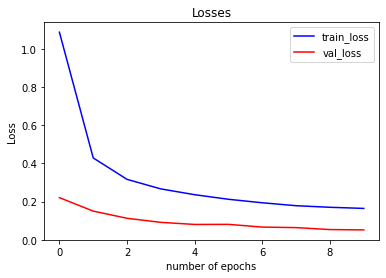

In [17]:
plt.plot(history.history['loss'],color='b',label='train_loss')
plt.plot(history.history['val_loss'],color='r',label='val_loss')
plt.title('Losses')
plt.xlabel('number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

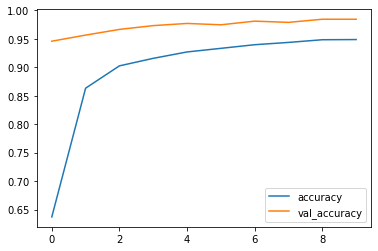

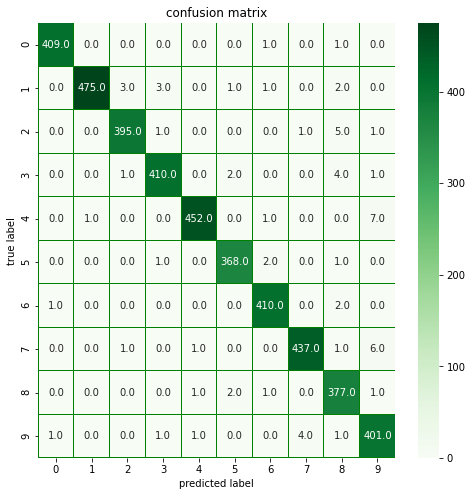

lowest training loss: 0.16400253772735596 
lowest validation loss: 0.0513552688062191
132/132 [==============================] - 1s 6ms/step - loss: 0.0514 - accuracy: 0.9843
train accuracy : 0.9856349229812622
validation accuracy : 0.9842857122421265


In [18]:
from sklearn.metrics import confusion_matrix

historyDF = pd.DataFrame(history.history)
historyDF.loc[:,['accuracy','val_accuracy']].plot()
#evaluate on val set
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1)
Y_true = np.argmax(y_val,axis=1)
confusion_mtx = confusion_matrix(Y_true,Y_pred_classes)
# plot heatmap to illustrate confusion matrix
figure,axs = plt.subplots(figsize=(8,8))
sns.heatmap(confusion_mtx,annot=True,fmt='.1f',cmap='Greens',linewidths=0.01,linecolor='green',ax=axs)
plt.title('confusion matrix')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()
print('lowest training loss: {} \nlowest validation loss: {}'.format(min(historyDF[:]['loss']),min(historyDF[:]['val_loss'])))
results_train = model.evaluate(x_train,y_train)
results_val = model.evaluate(x_val,y_val)
print('train accuracy : {}'.format(results_train[1]))
print('validation accuracy : {}'.format(results_val[1]))

predicted number is : 4


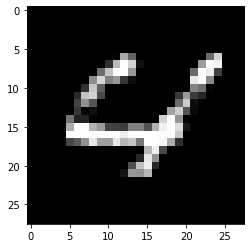

In [19]:
idx= 17468  # change index to make predictions on test set. index should be within 28000
example = pd.Series.to_numpy(test.iloc[idx])
plt.imshow(example.reshape(28,28),cmap='gray')
example = example.reshape(1,28,28,1)
prediction = model.predict(example)
print('predicted number is :',np.argmax(prediction))